<a href="https://colab.research.google.com/github/ErenB02/Proteomics_Project/blob/main/msc_ml_pr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
##Libraries
import pandas as pd
import numpy as np


# **Cord Blood Analysis Models**


### **Import datasets**


In [3]:
"""MSc Project 2025
   Eren Boybay
   01/08/2025"""

##BASELINE (cord blood)
#Full set of proteins
BL_prot = pd.read_csv("PR_prot_full.csv")

# #Full set of peptides
BL_pep = pd.read_csv("PR_pep_full.csv")

##################################################
# #Proteins + Clinical (combined)
BL_prot_comb = pd.read_csv("PR_prot_comb.csv")


# #Peptides + Clinical (combined)
BL_pep_comb = pd.read_csv("PR_pep_comb.csv")

###########################################################



In [4]:
# #Check column classes and format
BL_prot
print(BL_prot.value_counts('Condition'))
print(BL_prot.iloc[0:5, 0:5])

#Remove BioReplicate Column as it isnt needed
print(BL_prot.shape)
del BL_prot['BioReplicate']
del BL_prot['Unnamed: 0']
print(BL_prot.shape)

Condition
Control    46
Case       23
Name: count, dtype: int64
   Unnamed: 0  BioReplicate      KLKB1       HEP2        IC1
0           1             1  24.450761  23.750314  23.428587
1           2             2  25.490277  25.178411  25.352085
2           3             3  23.755662  23.505002  24.026145
3           4             4  24.171270  23.324472  23.999625
4           5             5  23.204199  23.578907  23.539359
(69, 40)
(69, 38)


In [5]:
# #Check column classes and format (peptide)
print(BL_pep.value_counts('Condition'))
print(BL_pep.iloc[0:5, 0:5])

#Remove BioReplicate Column as it isnt needed
print(BL_pep.shape)
del BL_pep['BioReplicate']
del BL_pep['Unnamed: 0']

print(BL_pep.shape)

Condition
Control    46
Case       23
Name: count, dtype: int64
   Unnamed: 0  BioReplicate  GGDVASMYTPNAQYCQMR  TGAVSGHSLK  CQFFSYATQTFHK
0           1             1           19.878706   15.836737      18.442625
1           2             2           19.530234   19.052184      19.117030
2           3             3           17.677780   18.851699      17.501468
3           4             4           17.962327   17.951094      17.902078
4           5             5           18.454905   14.214510      19.001342
(69, 963)
(69, 961)


### **Pre-processing & Feature Selection**

In [6]:
#Remove trailing space (found in 'Case ')
BL_prot['Condition'] = BL_prot['Condition'].str.strip()
#Convert cat variables to numerical ones (Case = 1, Control  0)
BL_prot.replace({'Condition': {'Control': 0, 'Case': 1}}, inplace=True)


#Repeat for peptide
BL_pep['Condition'] = BL_pep['Condition'].str.strip()
#Convert cat variables to numerical ones (Case = 1, Control  0)
BL_pep.replace({'Condition': {'Control': 0, 'Case': 1}}, inplace=True)


/tmp/ipython-input-1099701665.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  BL_prot.replace({'Condition': {'Control': 0, 'Case': 1}}, inplace=True)
/tmp/ipython-input-1099701665.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  BL_pep.replace({'Condition': {'Control': 0, 'Case': 1}}, inplace=True)


In [7]:
#Obtain label position (prot_comb)
print(BL_prot.columns.get_loc('Condition'))
print(BL_prot.shape)

print(BL_pep.columns.get_loc('Condition'))
print(BL_pep.shape)

37
(69, 38)
960
(69, 961)


*Features and Target*

In [8]:
#Features (all proteins)
X_prot =  BL_prot.iloc[:,:37]
#Label (Case - Control (object))
y_prot = BL_prot['Condition']
print(X_prot.shape)
print(y_prot.shape)


#Features (all peptides)
X_pep =  BL_pep.iloc[:,:960]
y_pep = BL_pep['Condition']
print(X_pep.shape)
print(y_pep.shape)

(69, 37)
(69,)
(69, 960)
(69,)


In [9]:
#Check for NaN values
print(f"There are {X_prot.isna().sum().sum()} NaN values present in the peptide features")
print(f"There are {X_pep.isna().sum().sum()} NaN values present in the peptide features")

X_pep = X_pep.fillna(0)
X_prot = X_prot.fillna(0)


There are 9 NaN values present in the peptide features
There are 314 NaN values present in the peptide features


##**Combined Data**

In [10]:
# #Check column classes and format
print(BL_prot_comb.value_counts('Condition'))
print(BL_prot_comb.shape)

print(BL_prot_comb.describe())
BL_prot_comb.head(5)


Condition
Control    46
Case       23
Name: count, dtype: int64
(69, 64)
       Unnamed: 0  BioReplicate      KLKB1       HEP2        IC1       A2AP  \
count   69.000000     69.000000  69.000000  69.000000  69.000000  69.000000   
mean    36.028986     36.028986  23.776263  23.783425  23.753897  23.753230   
std     20.382353     20.382353   0.792478   0.585376   0.633641   0.906611   
min      1.000000      1.000000  22.127657  21.728480  20.528667  21.310084   
25%     19.000000     19.000000  23.044912  23.402804  23.504829  23.145884   
50%     36.000000     36.000000  23.837142  23.837142  23.837142  23.837142   
75%     53.000000     53.000000  24.502713  24.194263  24.123763  24.503465   
max     71.000000     71.000000  25.490277  25.178411  25.352085  25.528851   

             C1R        C1S       CO4B       CFAB  ...        CO3        CO5  \
count  69.000000  69.000000  69.000000  69.000000  ...  68.000000  68.000000   
mean   23.866256  23.958688  23.718784  23.707138  ... 

,Unnamed: 0,BioReplicate,KLKB1,HEP2,IC1,A2AP,C1R,C1S,CO4B,CFAB,...,f21c_pss,f39_uncomplicated_preg_lab,Mat_BMI_15wk_mean,Paracetamol,Maternal.medication,Maternal.meds.specific,Mat.Smoke.age11,Smoking_preg,Smoking_mat_combined,Condition
0,1,1,24.450761,23.750314,23.428587,24.251994,24.767866,24.414225,23.885371,24.176718,...,#NULL!,#NULL!,#NULL!,#NULL!,0,NaN,2,#NULL!,0,Control
1,2,2,25.490277,25.178411,25.352085,25.528851,25.617563,25.447995,24.920952,25.204015,...,#NULL!,#NULL!,#NULL!,#NULL!,0,NaN,2,#NULL!,0,Control
2,3,3,23.755662,23.505002,24.026145,23.448011,24.079877,23.853763,23.897948,23.860816,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,NaN,#NULL!,#NULL!,#NULL!,Control
3,4,4,24.171270,23.324472,23.999625,24.354215,24.338580,24.393097,24.311819,24.833570,...,#NULL!,#NULL!,#NULL!,#NULL!,1,RitalinLG40 Vortioxetine,2,#NULL!,0,Case
4,5,5,23.204199,23.578907,23.539359,23.260835,23.677940,23.570194,23.849326,23.870853,...,10,0,36.4,1,1,Desogestrel,2,0,0,Control


In [11]:
pd.set_option('display.max_columns', None)
print(BL_prot_comb.columns.tolist())


['Unnamed: 0', 'BioReplicate', 'KLKB1', 'HEP2', 'IC1', 'A2AP', 'C1R', 'C1S', 'CO4B', 'CFAB', 'C1QA', 'MASP1', 'FHR1', 'ANT3', 'CO9', 'CO2', 'THRB', 'FA5', 'FA9', 'FA10', 'FA12', 'FIBA', 'PROC', 'PROS', 'VWF', 'KNG1', 'C4BPA', 'C1QC', 'C1RL', 'CO8G', 'CO6', 'CO3', 'CO5', 'CO7', 'CO8A', 'CO8B', 'CFAI', 'PLMN', 'CFAH', 'Maternal_BMI_15w', 'GA_weeks', 'BW', 'Child_BMI', 'Maternal_age_delivery', 'Paternal_age_delivery', 'Maternal.Occupation', 'f5_socioeconomic_index', 'Paternal.Occupation', 'f14_socioeconomic_index', 'Child.underlying.med', 'Specific.underlying', 'Child.medication', 'Specify.child.meds', 'Alcohol_preg', 'f21c_pss', 'f39_uncomplicated_preg_lab', 'Mat_BMI_15wk_mean', 'Paracetamol', 'Maternal.medication', 'Maternal.meds.specific', 'Mat.Smoke.age11', 'Smoking_preg', 'Smoking_mat_combined', 'Condition']


In [12]:
#Remove columns consisting of only 0
print(f"Prior to column removal: {BL_prot_comb.shape}")
print(f"Prior to column removal: {BL_pep_comb.shape}")


Prior to column removal: (69, 64)
Prior to column removal: (69, 987)


In [13]:
#Remove the other labels, retain only one to avoid data leakage (Condition)
del[BL_prot_comb['BioReplicate']]

del[BL_pep_comb['BioReplicate']]

#Remove redundant and unessecary columns (demographic data)
del BL_prot_comb['Unnamed: 0']


del BL_pep_comb['Unnamed: 0']

del[BL_prot_comb['Maternal.Occupation']]
del[BL_prot_comb['Paternal.Occupation']]
del[BL_prot_comb['Specific.underlying']]
del[BL_prot_comb['Specify.child.meds']]
del[BL_prot_comb['Maternal.meds.specific']]
del[BL_prot_comb['f39_uncomplicated_preg_lab']]
del[BL_prot_comb['f5_socioeconomic_index']]



del[BL_pep_comb['Maternal.Occupation']]
del[BL_pep_comb['Paternal.Occupation']]
del[BL_pep_comb['Specific.underlying']]
del[BL_pep_comb['Specify.child.meds']]
del[BL_pep_comb['Maternal.meds.specific']]
del[BL_pep_comb['f39_uncomplicated_preg_lab']]
del[BL_pep_comb['f5_socioeconomic_index']]




In [14]:
BL_prot_comb = BL_prot_comb.loc[:, (BL_prot_comb != 0).any(axis=0)]
BL_pep_comb = BL_pep_comb.loc[:, (BL_pep_comb != 0).any(axis=0)]

print(f"After column removal: {BL_prot_comb.shape}")
print(f"After column removal: {BL_pep_comb.shape}")


After column removal: (69, 55)
After column removal: (69, 978)


In [15]:
#Check for NaN values
print(f"There are {BL_prot_comb.isna().sum().sum()} NaN values present in the combined protein features")
print(f"There are {BL_pep_comb.isna().sum().sum()} NaN values present in the combined peptide features")

#Replace #NULL! with NaN
BL_prot_comb.replace('#NULL!', np.nan, inplace=True)
BL_pep_comb.replace('#NULL!', np.nan, inplace=True)

#Replace NaN values with 0
BL_prot_comb = BL_prot_comb.fillna(0)
BL_pep_comb = BL_pep_comb.fillna(0)

There are 9 NaN values present in the combined protein features
There are 314 NaN values present in the combined peptide features


In [16]:
#Select numeric columns only
numeric_cols_prot = BL_prot_comb.select_dtypes(include=[np.number]).columns
numeric_cols_pep = BL_pep_comb.select_dtypes(include=[np.number]).columns


#Replace all negatives values with 0
BL_prot_comb[numeric_cols_prot] = BL_prot_comb[numeric_cols_prot].clip(lower=0)
BL_pep_comb[numeric_cols_pep] = BL_pep_comb[numeric_cols_pep].clip(lower=0)

In [17]:
#Remove trailing space (found in 'Case ')
BL_prot_comb['Condition'] = BL_prot_comb['Condition'].str.strip()
#Convert cat variables to numerical ones (Case = 1, Control  0)
BL_prot_comb.replace({'Condition': {'Control': 0, 'Case': 1}}, inplace=True)


#Repeat for peptide
BL_pep_comb['Condition'] = BL_pep_comb['Condition'].str.strip()
#Convert cat variables to numerical ones (Case = 1, Control  0)
BL_pep_comb.replace({'Condition': {'Control': 0, 'Case': 1}}, inplace=True)

/tmp/ipython-input-3960454167.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  BL_prot_comb.replace({'Condition': {'Control': 0, 'Case': 1}}, inplace=True)
/tmp/ipython-input-3960454167.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  BL_pep_comb.replace({'Condition': {'Control': 0, 'Case': 1}}, inplace=True)


In [18]:
#Obtain label position (prot_comb)
print(BL_prot_comb.columns.get_loc('Condition'))
print(BL_prot_comb.shape)

54
(69, 55)


In [19]:
#Obtain label position (prot_comb)
print(BL_pep_comb.columns.get_loc('Condition'))
print(BL_pep_comb.shape)

977
(69, 978)


In [20]:
#Features (all proteins + clin data)
X_prot_comb =  BL_prot_comb.iloc[:,:54]

#Label (Case - Control (object))
y_prot_comb = BL_prot_comb['Condition']
print(f"Combined protein data feature and label shape: ")
print(X_prot_comb.shape)
print(y_prot_comb.shape)


#Features (all peptides + clin data)
X_pep_comb =  BL_pep_comb.iloc[:,:977]

#Label (Case - Control (object))
y_pep_comb = BL_pep_comb['Condition']
print(f"Combined peptide data feature and label shape: ")
print(X_pep_comb.shape)
print(y_pep_comb.shape)


Combined protein data feature and label shape: 
(69, 54)
(69,)
Combined peptide data feature and label shape: 
(69, 977)
(69,)


## **Clinical Data only**

In [21]:
#Clinical data only (BASELINE)
BL_clin_dat = pd.read_csv("PIRAMID_clin.csv")
BL_clin_dat.head(20)

,Maternal_BMI_15w,GA_weeks,BW,Child_BMI,Maternal_age_delivery,Paternal_age_delivery,Maternal.Occupation,f5_socioeconomic_index,Paternal.Occupation,f14_socioeconomic_index,Child.underlying.med,Specific.underlying,Child.medication,Specify.child.meds,Alcohol_preg,f21c_pss,f39_uncomplicated_preg_lab,Mat_BMI_15wk_mean,Paracetamol,Maternal.medication,Maternal.meds.specific,Mat.Smoke.age11,Smoking_preg,Smoking_mat_combined,Condition
0,22.3,41,3620,15.0215,31,#NULL!,Payroll administration,#NULL!,Software manager,#NULL!,1,Peanut Allergy,1,Becotide,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,NaN,2,#NULL!,0,Control
1,32.9,40.1,3530,15.6903,30,39,Paeds Nurse,#NULL!,Plasterer,#NULL!,0,NaN,0,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,NaN,2,#NULL!,0,Control
2,30.8,40.6,3310,16.0793,29,#NULL!,Regional manager,#NULL!,Carpenter/Fabricator,#NULL!,1,NaN,1,Becotide,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,NaN,#NULL!,#NULL!,#NULL!,Control
3,24.5,39.1,3270,14.1798,29,28,HSE Procurement officer,#NULL!,Care Assistant,#NULL!,0,NaN,1,"RitalinLG20, Amotoxatine",#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,1,RitalinLG40 Vortioxetine,2,#NULL!,0,Case
4,36.4,40.6,4250,18.3592,30,33,Accountant,61,Deal Desk Manager,60,6,Sep Anx,0,NaN,0,10,0,36.4,1,1,Desogestrel,2,0,0,Control
5,24.5,40.9,3200,15.1904,31,34,Medical Dosiometrist,#NULL!,Health and Safety Manager,#NULL!,0,NaN,0,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,NaN,2,#NULL!,0,Case
6,16.2,39.3,3200,17.4576,20,#NULL!,Beautician,#NULL!,NaN,#NULL!,3,Awaiting formal Dx,0,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,0,NaN,2,#NULL!,0,Control
7,21.9,40,3340,15.3739,36,40,Pharma - Biochemist,#NULL!,Project Manager,#NULL!,0,NaN,0,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,1,"Amitriptyline, Venlafaxine",2,#NULL!,0,Control
8,22.1,41.4,4880,19.9991,33,#NULL!,Paediatric Dietitian,#NULL!,Warehouse manager,#NULL!,0,NaN,1,Vitamin D,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,1,Vit B12 1g.day,2,#NULL!,0,Control
9,23.2,39.6,3170,16.1224,30,31,Procurement Officer,#NULL!,Team Leader - Pharma,#NULL!,0,NaN,0,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,1,L-thy,2,#NULL!,0,Control


In [22]:
BL_clin_dat.dtypes


,0
Maternal_BMI_15w,object
GA_weeks,object
BW,int64
Child_BMI,object
Maternal_age_delivery,int64
Paternal_age_delivery,object
Maternal.Occupation,object
f5_socioeconomic_index,object
Paternal.Occupation,object
f14_socioeconomic_index,object


In [23]:
print(BL_clin_dat.columns.tolist())

['Maternal_BMI_15w', 'GA_weeks', 'BW', 'Child_BMI', 'Maternal_age_delivery', 'Paternal_age_delivery', 'Maternal.Occupation', 'f5_socioeconomic_index', 'Paternal.Occupation', 'f14_socioeconomic_index', 'Child.underlying.med', 'Specific.underlying', 'Child.medication', 'Specify.child.meds', 'Alcohol_preg', 'f21c_pss', 'f39_uncomplicated_preg_lab', 'Mat_BMI_15wk_mean', 'Paracetamol', 'Maternal.medication', 'Maternal.meds.specific', 'Mat.Smoke.age11', 'Smoking_preg', 'Smoking_mat_combined', 'Condition']


In [24]:
# #Remove columns that are relevant to child (DONT TOUCH)

# del[BL_clin_dat['Birthweight']]
# del[BL_clin_dat['BMI_Child']]
# del[BL_clin_dat['f26_sex']]
# del[BL_clin_dat['f26_birthwgt']]
# del[BL_clin_dat['f26_head_circum']]
# del[BL_clin_dat['f26_length']]
del[BL_clin_dat['Maternal.Occupation']]
del[BL_clin_dat['Paternal.Occupation']]
del[BL_clin_dat['Specific.underlying']]
del[BL_clin_dat['Specify.child.meds']]
del[BL_clin_dat['Maternal.meds.specific']]
del[BL_clin_dat['f39_uncomplicated_preg_lab']]
del[BL_clin_dat['f5_socioeconomic_index']]



In [25]:
#Remove columns consisting of only 0
print(f"Prior to column removal: {BL_clin_dat.shape}")
BL_clin_dat = BL_clin_dat.loc[:, (BL_clin_dat != 0).any(axis=0)]
print(f"After column removal: {BL_clin_dat.shape}")

Prior to column removal: (72, 18)
After column removal: (72, 18)


In [26]:
#Check for NaN values
print(f"There are {BL_clin_dat.isna().sum().sum()} NaN values present in the clinical features")

#Replace #NULL! with NaN
BL_clin_dat.replace('#NULL!', np.nan, inplace=True)

#Replace NaN values with 0
BL_clin_dat = BL_clin_dat.fillna(0)


There are 0 NaN values present in the clinical features


In [27]:
#Select numeric columns only
numeric_cols_prot = BL_clin_dat.select_dtypes(include=[np.number]).columns


#Replace all negatives values with 0
BL_clin_dat[numeric_cols_prot] = BL_clin_dat[numeric_cols_prot].clip(lower=0)


In [28]:
#Remove trailing space (found in 'Case ')
BL_clin_dat['Condition'] = BL_clin_dat['Condition'].str.strip()
#Convert cat variables to numerical ones (Case = 1, Control  0)
BL_clin_dat.replace({'Condition': {'Control': 0, 'Case': 1}}, inplace=True)


/tmp/ipython-input-1815288119.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  BL_clin_dat.replace({'Condition': {'Control': 0, 'Case': 1}}, inplace=True)


In [29]:
#Obtain label position (prot_comb)
print(BL_clin_dat.columns.get_loc('Condition'))
print(BL_clin_dat.shape)

17
(72, 18)


In [30]:
#Features (all proteins + clin data)
X_clin =  BL_clin_dat.iloc[:,:17]

#Label (Case - Control (object))
y_clin = BL_clin_dat['Condition']
print(f"Clinical data features and label shape: ")
print(X_clin.shape)
print(y_clin.shape)

Clinical data features and label shape: 
(72, 17)
(72,)


## **EW PIPLINE (filtered)**

### *Correlation Filter*

In [31]:
#Create correlation matrix (pearson)
corr_matrix = X_prot_comb.corr().abs()

#Take upper traingle portion of matrix to avoid redundancy
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

#Drop features that are higly correlated (>0.9)
drop_prot = [col for col in upper.columns if any(upper[col] > 0.9)]

#Drop highly correlated features and create filtered dataset
X_filt_prot_comb = X_prot_comb.drop(columns=drop_prot)



#Repeat for other features (peptides, combined, clinical, etc.)
corr_matrix = X_pep.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
drop_pep = [col for col in upper.columns if any(upper[col] > 0.9)]
X_filt_pep = X_pep.drop(columns=drop_pep)


#Peptide combined
corr_matrix = X_pep_comb.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
drop_pep_comb = [col for col in upper.columns if any(upper[col] > 0.9)]
X_filt_pep_comb = X_pep_comb.drop(columns=drop_pep_comb)



#Clinical combined
corr_matrix = X_clin.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
drop_clin = [col for col in upper.columns if any(upper[col] > 0.9)]
X_filt_clin = X_clin.drop(columns=drop_clin)



In [32]:
#Show results of filtering
print("Filtered protein combined dims:", X_filt_prot_comb.shape)
print(f"Number of features removed: {len(drop_prot)}")

print("Filtered peptide dims:", X_filt_pep.shape)
print(f"Number of features removed: {len(drop_pep)}")

print("Filtered peptide combined dims:", X_filt_pep_comb.shape)
print(f"Number of features removed: {len(drop_pep_comb)}")


# print("Filtered clinical dims:", X_filt_clin.shape)
# print(f"Number of features removed: {len(drop_clin)}")

Filtered protein combined dims: (69, 44)
Number of features removed: 10
Filtered peptide dims: (69, 671)
Number of features removed: 289
Filtered peptide combined dims: (69, 688)
Number of features removed: 289


### *CV fold: Train and Test Subsets*

In [33]:
from sklearn.model_selection import RepeatedStratifiedKFold

k_prot = 5
k_pep = 10
k_clin = 5

#Prepare CV fold iterations
skf_prot = RepeatedStratifiedKFold(n_splits=k_prot, n_repeats=10, random_state=25)
skf_pep = RepeatedStratifiedKFold(n_splits=k_pep, n_repeats=10, random_state=25)
skf_clin = RepeatedStratifiedKFold(n_splits=k_clin, n_repeats=10, random_state=25)


#Protein data
#Iterate over each fold and prepare train and test subsets for training and predictions
for prot_fold, (train_idx, test_idx) in enumerate(skf_prot.split(X_prot, y_prot)):
  #Subset training and test folds from particular dataset
    X_train_prot, X_test_prot = X_prot.iloc[train_idx], X_prot.iloc[test_idx]
    y_train_prot, y_test_prot = y_prot.iloc[train_idx], y_prot.iloc[test_idx]
    #Print dimensions of train and test
    print(f"Protein folds {prot_fold}: Training set shape {X_train_prot.shape}, Test set shape {X_test_prot.shape}")

#Combined protein dataset
for prot_comb_fold, (train_idx, test_idx) in enumerate(skf_prot.split(X_filt_prot_comb, y_prot_comb)):
    X_train_prot_comb, X_test_prot_comb = X_filt_prot_comb.iloc[train_idx], X_filt_prot_comb.iloc[test_idx]
    y_train_prot_comb, y_test_prot_comb = y_prot_comb.iloc[train_idx], y_prot_comb.iloc[test_idx]
    print(f"Combined protein folds {prot_comb_fold}: Training set shape {X_train_prot_comb.shape}, Test set shape {X_test_prot_comb.shape}")

#Peptide Data
for pep_fold, (train_idx, test_idx) in enumerate(skf_pep.split(X_filt_pep, y_pep)):
    X_train_pep, X_test_pep = X_filt_pep.iloc[train_idx], X_filt_pep.iloc[test_idx]
    y_train_pep, y_test_pep = y_pep.iloc[train_idx], y_pep.iloc[test_idx]
    print(f"Peptide folds {pep_fold}: Training set shape {X_train_pep.shape}, Test set shape {X_test_pep.shape}")

#Peptide Combined Data
for pep_comb_fold, (train_idx, test_idx) in enumerate(skf_pep.split(X_filt_pep_comb, y_pep_comb)):
    X_train_pep_comb, X_test_pep_comb = X_filt_pep_comb.iloc[train_idx], X_filt_pep_comb.iloc[test_idx]
    y_train_pep_comb, y_test_pep_comb = y_pep_comb.iloc[train_idx], y_pep_comb.iloc[test_idx]
    print(f"Combined peptide folds {pep_comb_fold}: Training set shape {X_train_pep_comb.shape}, Test set shape {X_test_pep_comb.shape}")


#Clinical Data
for clin_fold, (train_idx, test_idx) in enumerate(skf_clin.split(X_filt_clin, y_clin)):
    X_train_clin, X_test_clin = X_filt_clin.iloc[train_idx], X_filt_clin.iloc[test_idx]
    y_train_clin, y_test_clin = y_clin.iloc[train_idx], y_clin.iloc[test_idx]
    print(f"Clinical folds {clin_fold}: Training set shape {X_train_clin.shape}, Test set shape {X_test_clin.shape}")

Protein folds 0: Training set shape (55, 37), Test set shape (14, 37)
Protein folds 1: Training set shape (55, 37), Test set shape (14, 37)
Protein folds 2: Training set shape (55, 37), Test set shape (14, 37)
Protein folds 3: Training set shape (55, 37), Test set shape (14, 37)
Protein folds 4: Training set shape (56, 37), Test set shape (13, 37)
Protein folds 5: Training set shape (55, 37), Test set shape (14, 37)
Protein folds 6: Training set shape (55, 37), Test set shape (14, 37)
Protein folds 7: Training set shape (55, 37), Test set shape (14, 37)
Protein folds 8: Training set shape (55, 37), Test set shape (14, 37)
Protein folds 9: Training set shape (56, 37), Test set shape (13, 37)
Protein folds 10: Training set shape (55, 37), Test set shape (14, 37)
Protein folds 11: Training set shape (55, 37), Test set shape (14, 37)
Protein folds 12: Training set shape (55, 37), Test set shape (14, 37)
Protein folds 13: Training set shape (55, 37), Test set shape (14, 37)
Protein folds 14

### *Volcano Filtering, Model Training and Prediction* - **LOGISTIC REGRESSION**

In [59]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.feature_selection import chi2
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc as auc_score, confusion_matrix

from sklearn.feature_selection import chi2
from scipy import stats
import pandas as pd

from sklearn.feature_selection import chi2
from scipy import stats
from joblib import Parallel, delayed
import pandas as pd
import numpy as np

def volcano_analysis(X_train, y_train, dataset_name="GENERAL", p_threshold=0.05, top_n=50, n_jobs=-1):
    """
    Perform volcano analysis to select features based on statistical significance.

    Categorical features: chi-squared test
    Continuous features: vectorized + parallelized t-test
    Returns a list of selected feature names only.

    Parameters:
        X_train : pd.DataFrame
            Training feature matrix.
        y_train : pd.Series or np.array
            Target vector.
        dataset_name : str
            Dataset label for printing/logging.
        p_threshold : float
            Significance threshold for feature selection.
        top_n : int
            Number of features to select by variance if no feature passes volcano.
        n_jobs : int
            Number of parallel jobs for t-tests (-1 = use all CPUs).

    Returns:
        selected_features : list
            List of selected column names.
    """

    selected_features = []

    # Identify categorical vs continuous features
    categorical_features = [col for col in X_train.columns if X_train[col].dtype == 'object' or X_train[col].nunique() < 10]
    continuous_features = [col for col in X_train.columns if col not in categorical_features]

    # --- Categorical features: chi-squared test ---
    if len(categorical_features) > 0:
        X_cat = X_train[categorical_features].apply(lambda x: pd.factorize(x)[0])
        chi2_stats, p_values = chi2(X_cat, y_train)
        cat_selected = X_cat.columns[p_values < p_threshold].tolist()
        selected_features.extend(cat_selected)
        print(f"Chi-squared selected {len(cat_selected)} categorical features with p < {p_threshold}")

    # --- Continuous features: vectorized + parallel t-test ---
    if len(continuous_features) > 0:
        X_cont = X_train[continuous_features].to_numpy()
        y_vals = y_train.to_numpy()
        mask0 = y_vals == 0
        mask1 = y_vals == 1
        class0_vals = X_cont[mask0, :]
        class1_vals = X_cont[mask1, :]

        # Vectorized t-test
        t_stats, p_vals = stats.ttest_ind(class0_vals, class1_vals, axis=0, nan_policy='omit')
        cont_selected = [f for f, p in zip(continuous_features, p_vals) if p < p_threshold]
        selected_features.extend(cont_selected)
        print(f"T-test selected {len(cont_selected)} continuous features with p < {p_threshold}")

    # --- Fallback if no features selected ---
    if len(selected_features) == 0:
        print(f"No features passed volcano analysis. Selecting top {top_n} features by variance instead.")
        feature_scores = X_train.var()
        selected_features = feature_scores.nlargest(top_n).index.tolist()

    return selected_features




# --- Your existing CV setup ---

k_prot = 5

cv_results = []

DATASET_NAME = "Protein & Clinical Data"  # Can be "PEPTIDE", "CLINICAL", etc.
USE_VOLCANO = False  # Enable volcano filtering (chi2 or t-test depending on dataset)

# Select dataset and CV splitter (example variables - replace with your data)
if DATASET_NAME == "Protein Full":
    X_data, y_data, skf_data, k_splits = X_prot, y_prot, skf_prot, k_prot
elif DATASET_NAME == "Peptide Full":
    X_data, y_data, skf_data, k_splits = X_filt_pep, y_pep, skf_pep, k_pep
elif DATASET_NAME == "Clinical Data":
    X_data, y_data, skf_data, k_splits = X_filt_clin, y_clin, skf_clin, k_clin
elif DATASET_NAME == "Protein & Clinical Data":
    X_data, y_data, skf_data, k_splits = X_filt_prot_comb, y_prot_comb, skf_prot, k_prot
elif DATASET_NAME == "Peptide & Clinical Data":
    X_data, y_data, skf_data, k_splits = X_filt_pep_comb, y_pep_comb, skf_pep, k_pep

print(f"=== {DATASET_NAME} DATA CROSS-VALIDATION PIPELINE ===")
print(f"Volcano filtering: {'ENABLED' if USE_VOLCANO else 'DISABLED'}")

# Fixed fold numbering - track repetitions and folds properly
total_iterations = 0
for train_idx, test_idx in skf_data.split(X_data, y_data):

    # Calculate current repetition and fold
    current_repetition = (total_iterations // k_splits) + 1
    current_fold = (total_iterations % k_splits) + 1

    print(f"\n--- REPETITION {current_repetition}, FOLD {current_fold}/{k_splits} ---")

    X_train, X_test = X_data.iloc[train_idx], X_data.iloc[test_idx]
    y_train, y_test = y_data.iloc[train_idx], y_data.iloc[test_idx]

    print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

    # Volcano filtering applied only if USE_VOLCANO is True
    if USE_VOLCANO:
        print("Performing volcano analysis...")
        selected_features = volcano_analysis(X_train, y_train, dataset_name=DATASET_NAME)

        if len(selected_features) == 0:
            print("No features selected by volcano/chi2 filtering. Falling back to top 50 by variance.")
            feature_variances = X_train.var()
            selected_features = feature_variances.nlargest(50).index.tolist()

        X_train_reduced = X_train[selected_features]
        X_test_reduced = X_test[selected_features]

        print(f"Selected {len(selected_features)} features.")
        print(f"Reduced training set shape: {X_train_reduced.shape}")

    else:
        print("Skipping volcano analysis - using all features.")
        X_train_reduced = X_train
        X_test_reduced = X_test
        selected_features = X_train.columns.tolist()
        print(f"Using all {len(selected_features)} features.")

    # Hyperparameter tuning with nested CV (inner 3-fold)
    param_grid = {'C': [0.01, 0.1, 1, 10]}

    inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    lasso_logistic = LogisticRegression(
        penalty='l1',
        solver='liblinear',
        random_state=42,
        max_iter=1000
    )

    grid_search = GridSearchCV(
        lasso_logistic,
        param_grid,
        cv=inner_cv,
        scoring='roc_auc',
        n_jobs=-1
    )

    grid_search.fit(X_train_reduced, y_train)

    best_C = grid_search.best_params_['C']
    print(f"Best regularization parameter C: {best_C}")
    print(f"Best CV score: {grid_search.best_score_:.4f}")

    # Fit final model on full training subset with best hyperparameter
    final_model = LogisticRegression(
        penalty='l1',
        solver='liblinear',
        random_state=42,
        max_iter=1000,
        class_weight='balanced')

    final_model.fit(X_train_reduced, y_train)

    # Predictions and evaluation on test set
    y_pred = final_model.predict(X_test_reduced)
    y_pred_proba = final_model.predict_proba(X_test_reduced)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    fold_auc = roc_auc_score(y_test, y_pred_proba)

    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Test AUC: {fold_auc:.4f}")

    # Store fold results
    fold_results = {
        'repetition': current_repetition,
        'fold': current_fold,
        'total_iteration': total_iterations + 1,
        'n_features_selected': len(selected_features),
        'best_C': best_C,
        'best_cv_score': grid_search.best_score_,
        'test_accuracy': accuracy,
        'test_auc': fold_auc,
        'y_test': y_test,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'final_model': final_model
    }

    cv_results.append(fold_results)
    total_iterations += 1

# Existing CV summary
print("\n=== CROSS-VALIDATION SUMMARY ===")
results_df = pd.DataFrame(cv_results)
print(results_df[['repetition', 'fold', 'total_iteration', 'test_accuracy', 'test_auc', 'n_features_selected']])

print(f"\nMean Test Accuracy: {results_df['test_accuracy'].mean():.4f} ± {results_df['test_accuracy'].std():.4f}")
print(f"Mean Test AUC: {results_df['test_auc'].mean():.4f} ± {results_df['test_auc'].std():.4f}")
print(f"Mean Features Selected: {results_df['n_features_selected'].mean():.1f}")

# --- Compute mean sensitivity and specificity across folds ---
sensitivities = []
specificities = []

for fold in cv_results:
    tn, fp, fn, tp = confusion_matrix(fold['y_test'], fold['y_pred']).ravel()
    sens = tp / (tp + fn) if (tp + fn) > 0 else 0
    spec = tn / (tn + fp) if (tn + fp) > 0 else 0
    sensitivities.append(sens)
    specificities.append(spec)

sensitivities = np.array(sensitivities)
specificities = np.array(specificities)

print(f"Mean Sensitivity: {sensitivities.mean():.4f} ± {sensitivities.std():.4f}")
print(f"Mean Specificity: {specificities.mean():.4f} ± {specificities.std():.4f}")

=== Protein & Clinical Data DATA CROSS-VALIDATION PIPELINE ===
Volcano filtering: DISABLED

--- REPETITION 1, FOLD 1/5 ---
Training set shape: (55, 44), Test set shape: (14, 44)
Skipping volcano analysis - using all features.
Using all 44 features.
Best regularization parameter C: 1
Best CV score: 0.7308
Test Accuracy: 0.5000
Test AUC: 0.5500

--- REPETITION 1, FOLD 2/5 ---
Training set shape: (55, 44), Test set shape: (14, 44)
Skipping volcano analysis - using all features.
Using all 44 features.
Best regularization parameter C: 10
Best CV score: 0.6606
Test Accuracy: 0.7857
Test AUC: 0.7333

--- REPETITION 1, FOLD 3/5 ---
Training set shape: (55, 44), Test set shape: (14, 44)
Skipping volcano analysis - using all features.
Using all 44 features.
Best regularization parameter C: 10
Best CV score: 0.7162
Test Accuracy: 0.7143
Test AUC: 0.7556

--- REPETITION 1, FOLD 4/5 ---
Training set shape: (55, 44), Test set shape: (14, 44)
Skipping volcano analysis - using all features.
Using all 

In [60]:
def plot_mean_roc_per_fold(cv_results, dataset_name="GENERAL", n_splits=None, use_volcano=False):
    """
    Plot mean ROC curves for each fold (averaged across repetitions)
    and the overall mean ROC curve. Only the overall mean AUC is shown in the legend.

    Parameters:
    - use_volcano: Boolean indicating if volcano filtering was used
    """
    from sklearn.metrics import roc_curve, auc as auc_score, roc_auc_score
    import numpy as np
    import matplotlib.pyplot as plt

    if n_splits is None:
        n_splits = max([res['fold'] for res in cv_results])

    mean_fpr = np.linspace(0, 1, 100)

    # Store interpolated TPRs and AUCs per fold index
    tprs_per_fold = {fold: [] for fold in range(1, n_splits + 1)}
    aucs_per_fold = {fold: [] for fold in range(1, n_splits + 1)}

    # Group results by fold and collect TPRs and AUCs
    for res in cv_results:
        fold_idx = res['fold']
        fpr, tpr, _ = roc_curve(res['y_test'], res['y_pred_proba'])
        fold_auc = roc_auc_score(res['y_test'], res['y_pred_proba'])

        # Interpolate TPR for consistent FPR grid
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0

        tprs_per_fold[fold_idx].append(interp_tpr)
        aucs_per_fold[fold_idx].append(fold_auc)

    plt.figure(figsize=(10, 8))

    # Define colors for each fold
    fold_colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightgoldenrodyellow',
                   'lightpink', 'lightsteelblue', 'lightseagreen', 'lightyellow', 'lightgray']

    # Plot mean ROC curve for each fold (averaged across repetitions)
    fold_mean_tprs = []
    for fold in range(1, n_splits + 1):
        if len(tprs_per_fold[fold]) > 0:
            fold_mean_tpr = np.mean(tprs_per_fold[fold], axis=0)
            fold_mean_tpr[-1] = 1.0
            fold_mean_tprs.append(fold_mean_tpr)

            color = fold_colors[(fold-1) % len(fold_colors)]
            plt.plot(mean_fpr, fold_mean_tpr, alpha=0.6, color=color, lw=1.5, label='_nolegend_')

    overall_mean_tpr = np.mean(fold_mean_tprs, axis=0)
    overall_mean_tpr[-1] = 1.0

    all_test_aucs = [res['test_auc'] for res in cv_results]
    overall_mean_auc = np.mean(all_test_aucs)
    auc_std_error = np.std(all_test_aucs) / np.sqrt(len(all_test_aucs))
    plt.plot([], [], ' ', label=f"CV Folds = {k_prot}")

    # Plot overall mean ROC curve
    plt.plot(mean_fpr, overall_mean_tpr, color='b', lw=3,
             label=f"Mean AUC = {overall_mean_auc:.3f} ± {auc_std_error:.3f}")

    # Plot chance line
    plt.plot([0, 1], [0, 1], 'r--', lw=2, alpha=0.7, label='Chance')

    # Create dynamic title based on filtering status
    filter_status = "Filtered" if use_volcano else "No Filter"
    title = f"LASSO Logistic Regression; {dataset_name}"

    plt.xlabel("False Positive Rate", fontsize=14)  # Increased x-axis label font size
    plt.ylabel("True Positive Rate", fontsize=14)   # Increased y-axis label font size
    plt.title(title, fontsize=16)                  # Increased main title font size
    plt.legend(loc="lower right", fontsize=13)
    plt.grid(True, alpha=0.3)
    return plt.gcf()  # Return the current figure
    print(f"\nMean AUC: {overall_mean_auc:.4f} ± {auc_std_error:.4f}")

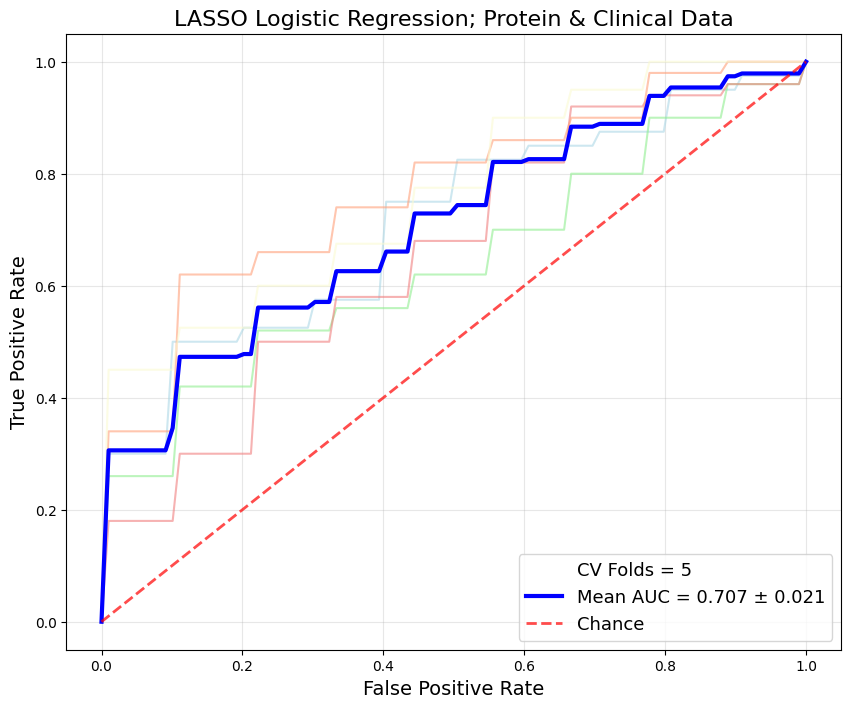

In [61]:
# For unfiltered results
#plot_mean_roc_per_fold(cv_results, dataset_name=DATASET_NAME, n_splits=10, use_volcano=False)


# For filtered results
plot_mean_roc_per_fold(cv_results, dataset_name=DATASET_NAME, n_splits=10)

import matplotlib as mpl

mpl.rcParams['pdf.fonttype'] = 42   # keep text as editable text
mpl.rcParams['ps.fonttype'] = 42    # same for EPS (if ever used)

plt.savefig(
    f"ROC_{DATASET_NAME}.png",
    format="png",
    bbox_inches="tight"   # trims whitespace
    # dpi optional or unnecessary
)

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_feature_importance_with_freq(cv_results, top_n=20, dataset_name="Dataset", use_volcano=False):
    """
    Plot feature importance across CV folds as **two separate plots**:
    1. Horizontal barplot of mean absolute coefficients with standard error bars
    2. Horizontal barplot of selection counts across folds
    """

    # --- Step 1: Collect all features across folds ---
    all_features = set()
    for fold in cv_results:
        if hasattr(fold['final_model'], 'feature_names_in_'):
            all_features.update(fold['final_model'].feature_names_in_)
        else:
            n_features = len(fold['final_model'].coef_[0])
            all_features.update([f'feature_{i}' for i in range(n_features)])
    all_features = list(all_features)
    if len(all_features) == 0:
        print("No features found across folds! Cannot plot feature importance.")
        return

    # --- Step 2: Collect coefficients and selection flags ---
    coefs_all_folds = []
    selected_flags = []
    for fold in cv_results:
        model = fold['final_model']
        model_features = list(model.feature_names_in_) if hasattr(model, 'feature_names_in_') else [f'feature_{i}' for i in range(len(model.coef_[0]))]
        coefs = np.zeros(len(all_features))
        selection_flag = np.zeros(len(all_features))
        for i, feature in enumerate(all_features):
            if feature in model_features:
                idx = model_features.index(feature)
                coefs[i] = abs(model.coef_[0][idx])
                selection_flag[i] = 1 if coefs[i] > 1e-6 else 0
        coefs_all_folds.append(coefs)
        selected_flags.append(selection_flag)

    coefs_all_folds = np.array(coefs_all_folds)
    selected_flags = np.array(selected_flags)

    # --- Step 3: Compute mean and standard error ---
    mean_coef = np.mean(coefs_all_folds, axis=0)
    stderr_coef = np.std(coefs_all_folds, axis=0) / np.sqrt(coefs_all_folds.shape[0])

    fimp_df = pd.DataFrame({
        "mean_importance": mean_coef,
        "stderr": stderr_coef
    }, index=all_features)

    # Get top features
    top_features_df = fimp_df[fimp_df["mean_importance"] > 1e-6].sort_values("mean_importance", ascending=False).head(top_n)
    top_feature_names = top_features_df.index.tolist()
    top_indices = [all_features.index(f) for f in top_feature_names]

    # --- Plot 1: Mean Absolute Coefficients ---
    plt.figure(figsize=(13, 9))
    means = top_features_df["mean_importance"].values
    std_errors_vals = top_features_df["stderr"].values
    plt.barh(top_feature_names, means, xerr=std_errors_vals,
              color = plt.cm.turbo_r(np.linspace(0, 1, len(top_feature_names))),
             alpha=0.7, capsize=5)
    plt.xlabel("Mean Absolute Coefficient", fontsize=14)
    plt.title(
        f"Feature Importance LASSO ; {dataset_name}",
        fontsize=16,
        loc='center'  # horizontally centered
      # move title above the axes to sit nicely
    ),
    plt.gca().invert_yaxis()  # highest feature on top
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.tight_layout()
    return plt.gcf()  # Return the current figure

    # # --- Plot 2: Feature Selection Counts ---
    # total_folds = coefs_all_folds.shape[0]
    # selection_counts = [np.sum(selected_flags[:, idx]) for idx in top_indices]
    # plt.figure(figsize=(12, 8))
    # plt.barh(top_feature_names, selection_counts, color='steelblue', alpha=0.7)
    # plt.xlabel(f"Selection Count (out of {total_folds} folds)", fontsize=14)
    # plt.title(f"Feature Selection Count LASSO ; {dataset_name}", fontsize=16)
    # plt.gca().invert_yaxis()
    # plt.xlim(0, total_folds)
    # plt.xticks(fontsize=13)
    # plt.yticks(fontsize=13)
    # plt.tight_layout()
    # plt.show()

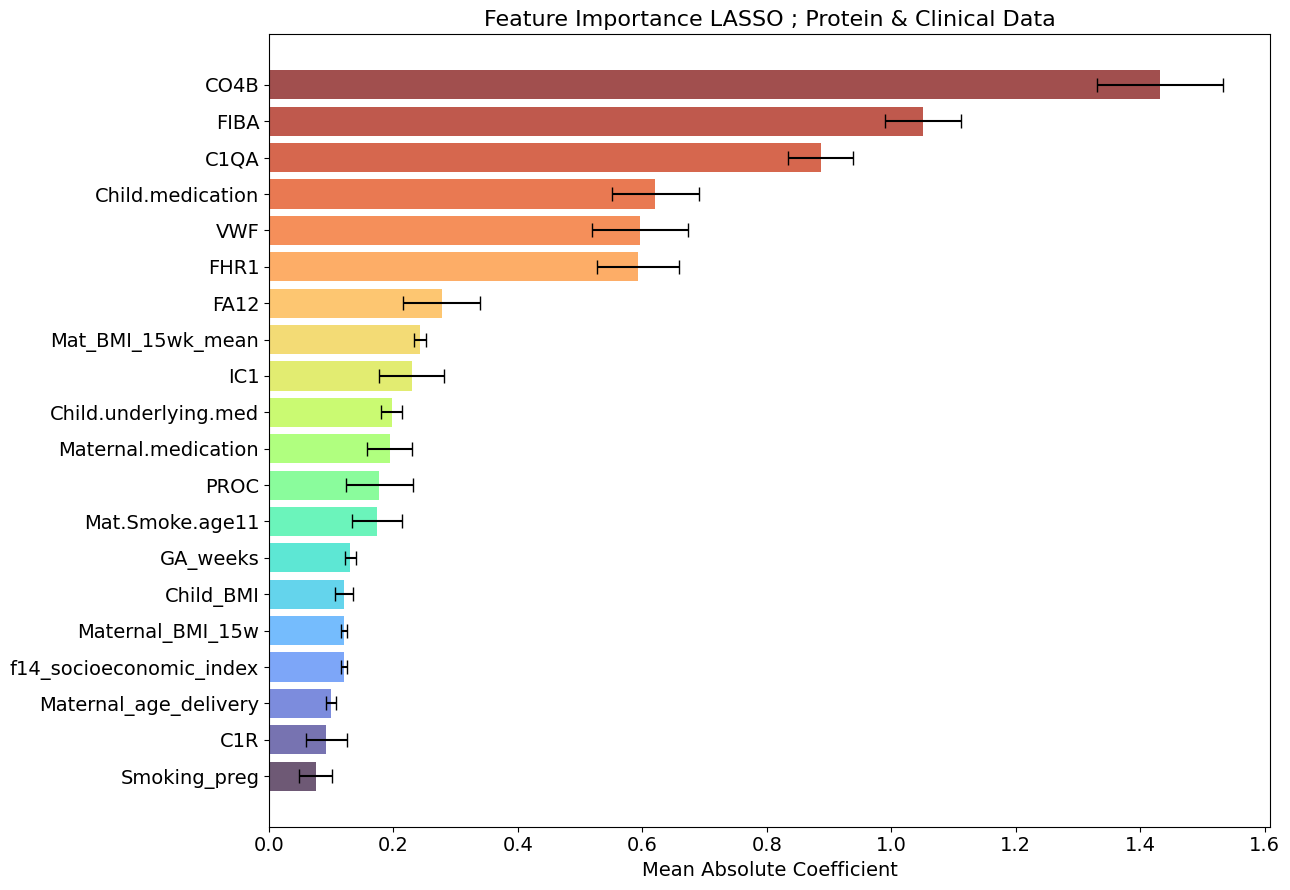

In [63]:
# For unfiltered results
#plot_feature_importance_with_freq(cv_results, top_n=20, dataset_name=DATASET_NAME , use_volcano=False)


# For filtered results
plot_feature_importance_with_freq(cv_results, top_n=20, dataset_name=DATASET_NAME, use_volcano=True)



mpl.rcParams['pdf.fonttype'] = 42   # keep text editable
mpl.rcParams['ps.fonttype'] = 42

plt.savefig(
    f"FI_{DATASET_NAME}.png",
    format="png",
    bbox_inches='tight'
    # dpi=300 only if rasterized parts exist
)

# Save the plot as PDF
plt.savefig(f"FI_{DATASET_NAME}.png",
            format="png",
            bbox_inches='tight',
            dpi=300)  # PDF doesn't need super high DPI for vectors

# **Serum Analysis Models**

In [ ]:
##PiRAMiD (serum)
#Full set of proteins
PM_prot_full = pd.read_csv(url)

#Full set of peptides
PM_pep_full = pd.read_csv(url)

#Proteins + Clinical (combined)
PM_prot_comb = pd.read_csv(url)
#Peptides + Clinical (combined)
PM_pep_comb = pd.read_csv(url)


# #Peptides (sig only)
# PM_pep_sig = pd.read_csv(url)


# #Peptides + Clinical (sig + clinical)
# PM_pep_sig_comb = pd.read_csv(url)